In [2]:
import pandas as pd

data = pd.read_csv('../data/train.csv')
# data.describe()
# data.columns
# feature = data['SalePrice']
# data['SalePrice'].describe()
new_data = data
# print new_data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.matshow(data.corr())

corr = data.corr()
f, ax = plt.subplots(figsize=(19,9))
sns.heatmap(corr,vmax = 0.8,square=True)

By seeing the heatmap we drop the least important feature which might not co ntribute for the efficien

In [4]:
data = data.drop(columns=['OverallCond','MSSubClass','KitchenAbvGr','EnclosedPorch','YrSold','BsmtFinSF1'])

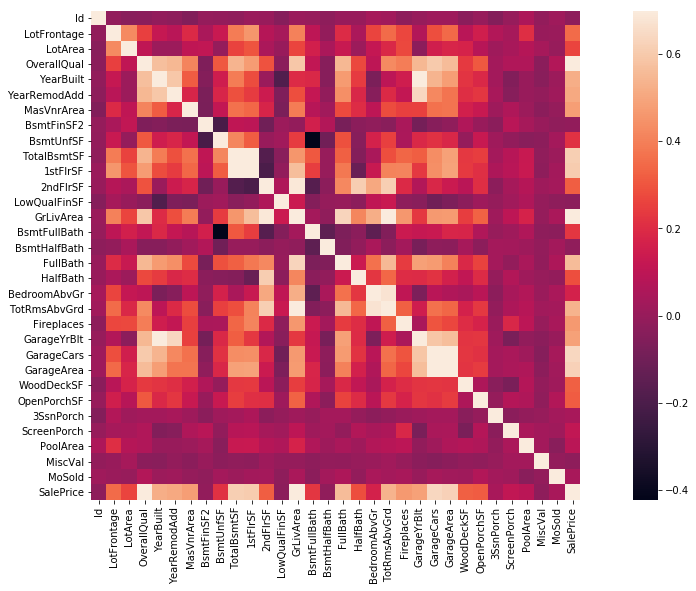

In [5]:
corr = data.corr()
f, ax = plt.subplots(figsize=(19,9))
sns.heatmap(corr,vmax = 0.7,square=True)

In [15]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

print X.columns

Index([u'MSZoning', u'LotFrontage', u'LotArea', u'Street', u'Alley',
       u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'YearBuilt', u'YearRemodAdd',
       u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation',
       u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenQual', u'TotRmsAbvGrd', u'Functional', u'Fireplaces',
       u'FireplaceQu', u'GarageType', u'GarageYrBlt', u'GarageFinish',
       u'GarageCars', u'GarageArea', u'GarageQual', u'GarageCond',
       u'PavedDr

In [7]:
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def ordinalEncode(data):
    enc = OrdinalEncoder()
    enc.fit(data)
    return enc.transform(data)
X = ordinalEncode(X)
X = X.drop(columns=['GarageYrBlt','LotFrontage','MasVnrArea'])

In [8]:

total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)



In [9]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 100)

regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
test_data = pd.read_csv('../Data/testc.csv')
X_test = test_data.iloc[:,1:]
X_test = X_test.drop(columns=['OverallCond','MSSubClass','KitchenAbvGr','EnclosedPorch','YrSold','BsmtFinSF1','GarageYrBlt','LotFrontage','MasVnrArea'])

In [21]:
X_test = ordinalEncode(X_test)

In [22]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(10)

In [23]:
X_test.columns

Index([u'LotArea', u'OverallQual', u'YearBuilt', u'YearRemodAdd',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath',
       u'FullBath', u'HalfBath', u'BedroomAbvGr', u'TotRmsAbvGrd',
       u'Fireplaces', u'GarageCars', u'GarageArea', u'WoodDeckSF',
       u'OpenPorchSF', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'MSZoning', u'Street', u'Alley', u'LotShape',
       u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond',
       u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'FireplaceQu', u'GarageType', u'Gara

In [24]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SaleCondition,0,0.0
MiscVal,0,0.0
GarageArea,0,0.0
WoodDeckSF,0,0.0
OpenPorchSF,0,0.0
3SsnPorch,0,0.0
ScreenPorch,0,0.0
PoolArea,0,0.0
MoSold,0,0.0
Fireplaces,0,0.0


In [25]:
test_output = regr.predict(X_test)

In [28]:
import numpy as np
file = open("../Data/submitnew.csv",'w')
file.write('Id,SalePrice\n')
count = 1461
# print(test_output)
for each in np.nditer(test_output):
#     print(each)
    file.write(str(count))
    count += 1
    file.write(',')
    file.write(str(each))
    file.write('\n')
file.close()